### Dieses Notebook zeigt ein einfaches Beispiel für ein flaches neuronales Netz zum Trainieren des MNIST-Datensatzes.

Laden der nötigen Bibliotheken:

In [15]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam 
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import ssl
ssl._create_default_https_context = ssl._create_unverified_context 
from sklearn.model_selection import train_test_split

Laden und Aufbereiten der Trainingsdaten:

In [16]:
def read_card_images(folder_path):
    x_data = []
    y_data = []

    # Get the list of files in the folder
    file_list = os.listdir(folder_path)

    for file_name in file_list:
        # Read the image file
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)

        # Preprocess the image (resize, normalize, etc.) if necessary
        # ...

        # Extract the color information from the image file name
        color = file_name.split('_')[1]
        number = file_name.split('_')[2]
        fill = file_name.split('_')[3]
        shape = file_name.split('_')[4]

        # Convert the color label to a numerical representation (e.g., red=0, green=1, blue=2)
        if color == 'r':
            label = 0
        elif color == 'g':
            label = 1
        else:
            label = 2

        # Append the image and label to the data arrays
        x_data.append(image)
        y_data.append(label)

    # Convert the data arrays to NumPy arrays
    x_data = np.array(x_data)
    y_data = np.array(y_data)

    return x_data, y_data

In [17]:
x_data, y_data = read_card_images('cards/')

In [18]:
def split_data(x_data, y_data, test_size=0.1, random_state=None):
    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, y_data, test_size=test_size, random_state=random_state)
    y_train = keras.utils.to_categorical(y_train, 3)
    y_test = keras.utils.to_categorical(y_test, 3)
    return x_train, x_test, y_train, y_test


In [19]:
x_train, x_test, y_train, y_test = split_data(x_data, y_data, test_size=0.1, random_state=42)

# Print the sizes of the training and test sets
print(y_train)
print(y_test)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0.

In [20]:
# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(500, 300, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

Ausgabe der Netzstruktur:

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 498, 298, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 249, 149, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 247, 147, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 123, 73, 64)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 574656)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Erstellen des Netzes mit Optimierungsmethode (z.B. SGD, RMSprop oder Adam):

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Trainineren des Netzes:

In [23]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=6,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/6
8/8 [==============================] - 13s 2s/step - loss: 9441.3867 - accuracy: 0.3719 - val_loss: 433.1428 - val_accuracy: 0.4815
Epoch 2/6
8/8 [==============================] - 13s 2s/step - loss: 226.8631 - accuracy: 0.5372 - val_loss: 94.4531 - val_accuracy: 0.5556
Epoch 3/6
8/8 [==============================] - 11s 1s/step - loss: 30.5425 - accuracy: 0.7727 - val_loss: 5.1011 - val_accuracy: 0.8519
Epoch 4/6
8/8 [==============================] - 11s 1s/step - loss: 10.7620 - accuracy: 0.8926 - val_loss: 8.1973 - val_accuracy: 0.8889
Epoch 5/6
8/8 [==============================] - 11s 1s/step - loss: 1.3193 - accuracy: 0.9545 - val_loss: 4.4152e-09 - val_accuracy: 1.0000
Epoch 6/6
8/8 [==============================] - 11s 1s/step - loss: 1.5458 - accuracy: 0.9669 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


Berechnen und Bewerten der Netzausgabe nach dem Training:

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.0
Test accuracy: 1.0


Ausgabe des Netzfehlers während des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

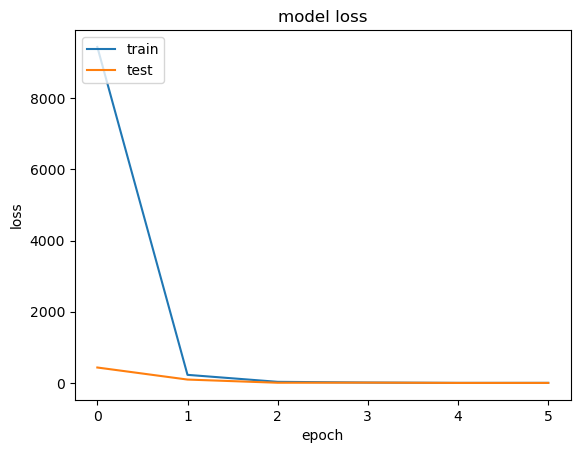

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ausgabe der Netz-Accuracy waehrend des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

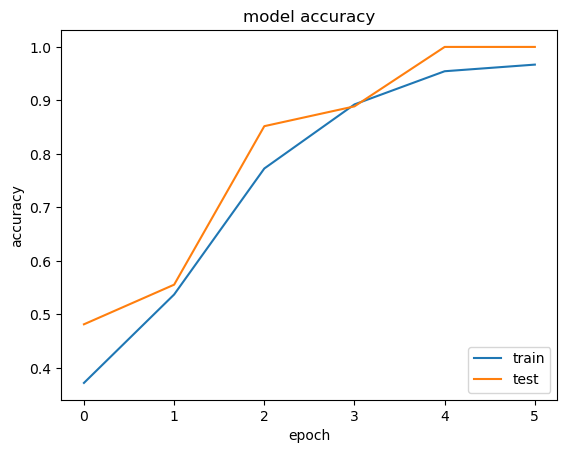

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Ausgabe der falsch klassifizierten Testdaten-Bilder:

In [27]:
pred = model.predict(x_test)
mask = ~(np.argmax(pred,axis=1)==np.argmax(y_test,axis=1))
wrong_pred=pred[mask,:]
wrong_label=np.argmax(wrong_pred,axis=1)
wrong_y=y_test[mask,:]
wrong_x=x_test[mask,:,:]
print(wrong_pred.shape[0],'out of',pred.shape[0],'false classifications in test dataset (',int(wrong_pred.shape[0]/pred.shape[0]*10000)/100,'% )')

for i in range(wrong_y.shape[0]):
    plt.imshow(1-wrong_x[i,:,:],cmap='gray')
    plt.title(str(np.argmax(wrong_y[i,:]))+' detected as '+str(wrong_label[i]))
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 345ms/step
0 out of 27 false classifications in test dataset ( 0.0 % )
